In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
fetal = pd.read_csv("fetal_health.csv")

In [3]:
target = fetal['fetal_health']
features = fetal.drop('fetal_health', axis = 1)

# encode the target data
le = preprocessing.LabelEncoder()
encoded_target = pd.DataFrame(le.fit_transform(target))

In [39]:
X = preprocessing.StandardScaler().fit_transform(X=features)
y = encoded_target.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.model_selection import GridSearchCV
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='hamming')
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(metric='hamming')

In [41]:
# test preds accuracy
test_preds = classifier.predict(X_test)
metrics.accuracy_score(y_test, test_preds)

0.8873239436619719

In [42]:
# from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 35))
distance_metrics = sorted(neighbors.VALID_METRICS['brute'])
param_grid = dict(n_neighbors=k_range)

# defining parameter range
best_neighbor_numbers_ = {}
for i in distance_metrics:
    try:
        classifier2 = neighbors.KNeighborsClassifier(metric=i)
        grid = GridSearchCV(classifier2, param_grid, cv = 10,
                            scoring='accuracy', return_train_score=False,
                            verbose=1)

        # fitting the model for grid search
        grid_search=grid.fit(X_train, y_train.ravel())
        # best_neighbor_number = grid_search.best_params_['n_neighbors']
        # best_neighbor_numbers.append(grid_search.best_params_['n_neighbors'])
        best_neighbor_numbers_[i] = grid_search.best_params_['n_neighbors']
    except Exception as e:
        print(e)

Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008

Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwarg

Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pair

Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metr

Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwarg

Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\

Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits
X should be a square kernel matrix
Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-p

Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\

Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwarg

Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packa

Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\skle

Fitting 10 folds for each of 34 candidates, totalling 340 fits
Fitting 10 folds for each of 34 candidates, totalling 340 fits


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008

In [43]:
# best_neighbor_numbers_
distance_metrics

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']

In [46]:
all_accuracies = {}
for i in range(0, len(distance_metrics)):
    try:
        # print(i)
        # print(best_neighbor_numbers_[i])
        which_metric = distance_metrics[i]
        how_many_neighbors = best_neighbor_numbers_[which_metric]
        newer_classifier = neighbors.KNeighborsClassifier(metric=which_metric,n_neighbors=how_many_neighbors)
        newer_classifier.fit(X_train, y_train.ravel())
        test_preds = newer_classifier.predict(X_test)
        all_accuracies[which_metric] = accuracy_score(y_test, test_preds)
    except Exception as e:
        print(f'{i} did not work: {e}')

C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


9 did not work: Haversine distance only valid in 2 dimensions
14 did not work: The 'VI' parameter is required for the mahalanobis metric when Y is passed.


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


19 did not work: 'precomputed'
22 did not work: __init__() takes exactly 1 positional argument (0 given)


C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
C:\Users\jackw\PycharmProjects\capstone-case-studies\venv\lib\site-packages\

In [47]:
all_accuracies

{'braycurtis': 0.9107981220657277,
 'canberra': 0.9154929577464789,
 'chebyshev': 0.9131455399061033,
 'cityblock': 0.9295774647887324,
 'correlation': 0.8873239436619719,
 'cosine': 0.9084507042253521,
 'dice': 0.7816901408450704,
 'euclidean': 0.92018779342723,
 'hamming': 0.8826291079812206,
 'jaccard': 0.7816901408450704,
 'kulsinski': 0.7816901408450704,
 'l1': 0.9295774647887324,
 'l2': 0.92018779342723,
 'manhattan': 0.9295774647887324,
 'matching': 0.7816901408450704,
 'minkowski': 0.92018779342723,
 'nan_euclidean': 0.92018779342723,
 'rogerstanimoto': 0.7816901408450704,
 'russellrao': 0.7816901408450704,
 'sokalmichener': 0.7816901408450704,
 'sokalsneath': 0.7816901408450704,
 'sqeuclidean': 0.92018779342723,
 'yule': 0.7816901408450704}

In [25]:
# new_classifier = neighbors.KNeighborsClassifier(n_neighbors=best_neighbor_number)
# new_classifier.fit(X_train, y_train.ravel())
# gridsearch_preds = new_classifier.predict(X_test)
# metrics.accuracy_score(y_test, gridsearch_preds)

KNeighborsClassifier(n_neighbors=3)

In [48]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [110]:
clustering = DBSCAN(eps=.8, metric='cityblock', min_samples=25)
clusters = clustering.fit(np.array(target).reshape(-1, 1))
# clustering.get_params()
# clustering.labels_

In [111]:
core_samples_mask = np.zeros_like(clusters.labels_, dtype=bool)
core_samples_mask[clusters.core_sample_indices_] = True
labels = clusters.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [112]:
n_noise_

0

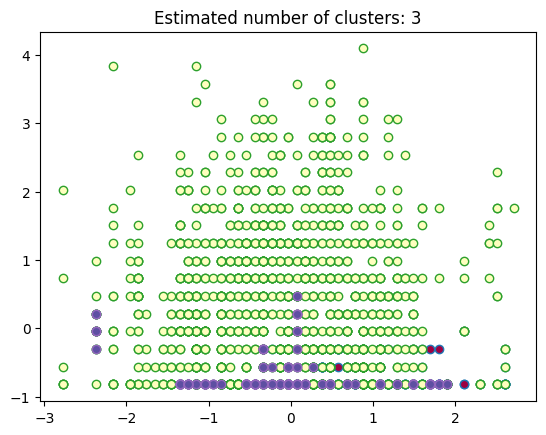

In [113]:
labels = clusters.labels_

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        # markeredgecolor="r",
        markersize=6,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        # markeredgecolor="y",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()